In [85]:
from PIL import Image, ImageFilter
from pdf2image import convert_from_path
import uuid
import os
import matplotlib.pyplot as plt
from skimage import io, util
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray
import random
import glob
import time
import math
import cv2

In [13]:
!rm images/*

In [14]:
# create images path
os.mkdir('images')

FileExistsError: [Errno 17] File exists: 'images'

In [15]:
pages = convert_from_path('PYTHON_MACHINE_LEARNING.pdf', dpi=50, output_folder='images', fmt='jpg', size=(500, None), grayscale=True)

In [16]:
pages_path = glob.glob('images/*.jpg')
sample_pages = random.sample(pages_path, 10)
sample_pages

['images/5e1270ee-fb57-49cd-9871-99766304a5e4-204.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-237.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-371.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-158.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-180.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-184.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-443.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-170.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-291.jpg',
 'images/5e1270ee-fb57-49cd-9871-99766304a5e4-387.jpg']

In [19]:
test_image = Image.open(random.choice(sample_pages))

### Adding some image filters to image
https://pillow.readthedocs.io/en/5.1.x/reference/ImageFilter.html

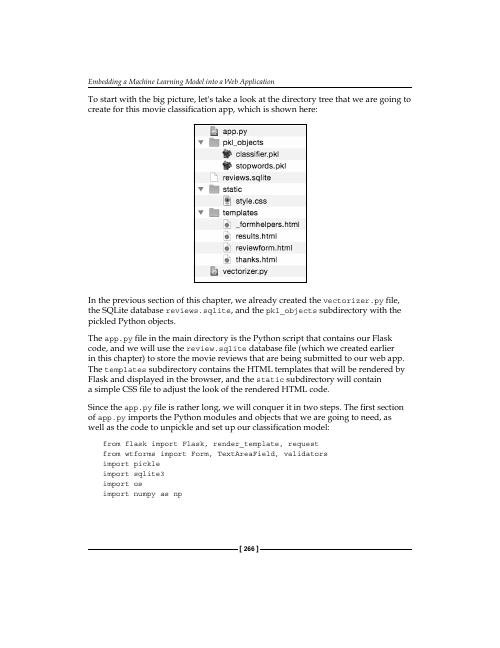

In [20]:
test_image

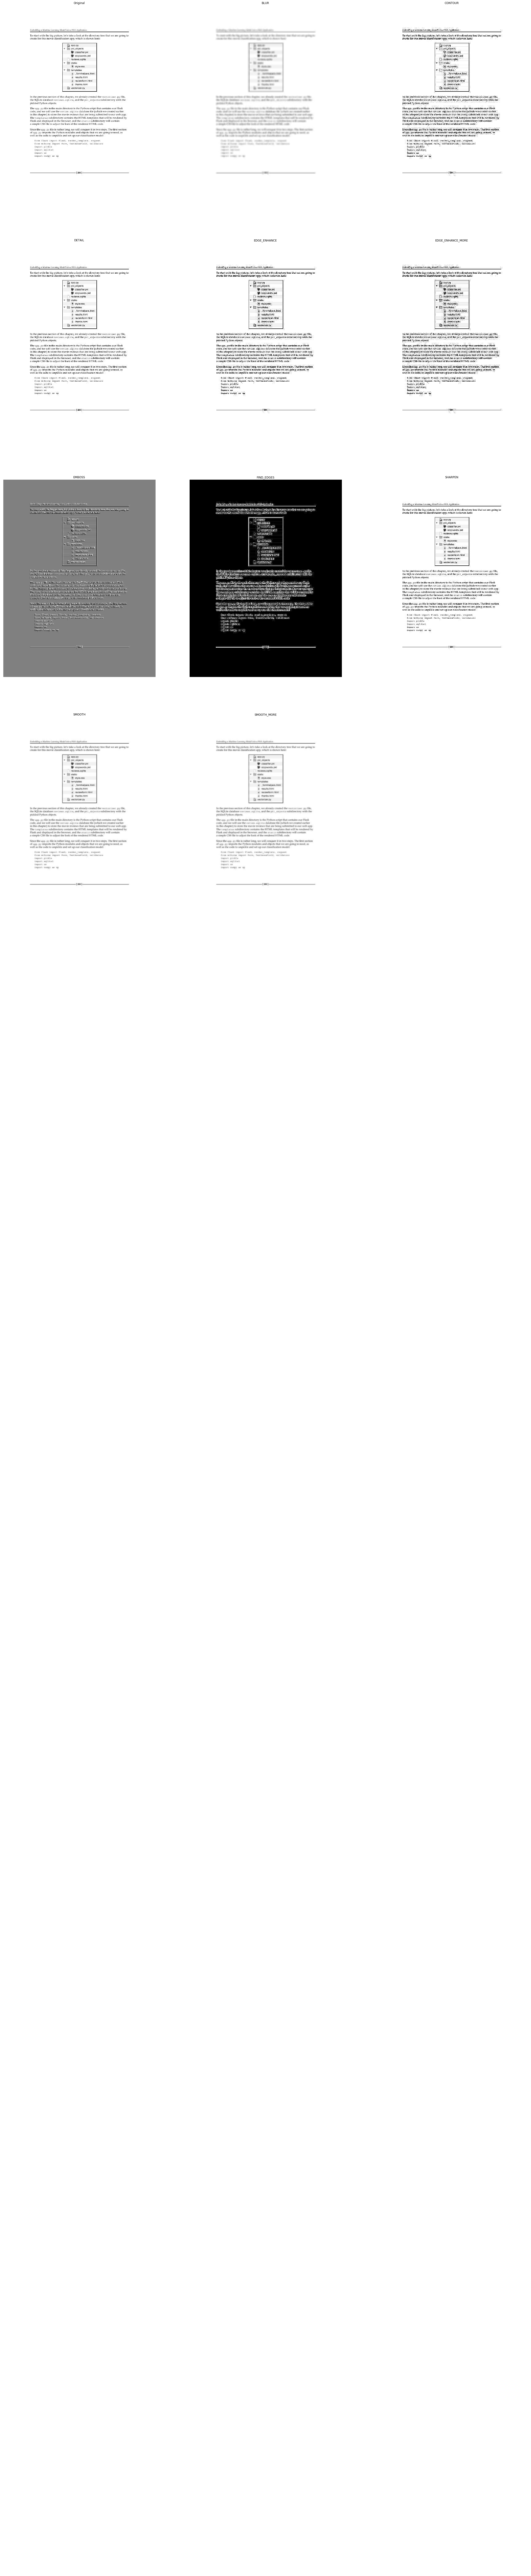

In [81]:
def try_all_filters(img, filters, num_cols=3):
  num_rows = math.ceil(len(filters) + 1. / num_cols)
  num_rows = int(num_rows)
  fig, ax = plt.subplots(num_rows, num_cols, figsize=(40, 200))

  ax = ax.ravel()

  ax[0].imshow(img)
  ax[0].set_title('Original')

  i = 1
  for func in filters:
    ax[i].imshow(img.filter(ImageFilter.__dict__[func]), cmap=plt.cm.gray)
    ax[i].set_title(func)
    i += 1
  
  for a in ax:
    a.axis('off')

  # fig.tight_layout()
  return fig, ax

filters = [
  'BLUR',
  'CONTOUR',
  'DETAIL',
  'EDGE_ENHANCE',
  'EDGE_ENHANCE_MORE',
  'EMBOSS',
  'FIND_EDGES',
  'SHARPEN',
  'SMOOTH',
  'SMOOTH_MORE'
]

fig, ax = try_all_filters(test_image, filters)
plt.show()

In [30]:
cv2_image = cv2.imread(sample_pages[0])
cv2_image

blur = cv2.GaussianBlur(cv2_image, (5, 5), 0)
cv2.imwrite('blured.jpg', blur)

True

In [66]:
def crappy_images(paths, filters=['EDGE_ENHANCE_MORE', 'SMOOTH', 'CONTOUR'], output_path=None):
    if not output_path:
        raise Exception('Missing output_path')
    try:
        os.mkdir(output_path)
        print('Output path: ' + output_path)
    except Exception:
        print('Output path: ' + output_path)
    for path in paths:
        img = Image.open(path)
        crappy = img
        for f in filters:
            crappy = crappy.filter(ImageFilter.__dict__[f])
        crappy.save(output_path + path.replace('images', ''))
    return

crappy_images(pages_path, output_path='crappy_images')

Output path: crappy_images


(648, 500, 3)

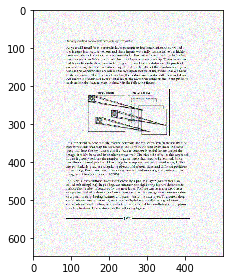

In [129]:
# print random crappy image
crappy_img = Image.open(random.choice(pages_path).replace('images', 'crappy_images'))
img = util.random_noise(io.imread(random.choice(pages_path)))
io.imshow(img)

img.shape